<center>
    <tr>
        <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
     </tr>
</center>

# Hybrid images

Faisal Qureshi\
Professor\
Faculty of Science\
Ontario Tech University\
Oshawa ON Canada\
http://vclab.science.ontariotechu.ca

## **Outline**


*   Image pyramids
*   Hybrid images

## **Task**
The goal is to laboratory is to construct hybrid images as suggested by Oliva et al. in their Siggraph 2006 paper [[doi](https://dl.acm.org/doi/10.1145/1141911.1141919)]. A hybrid image is static images which changes as a function of viewing distance. Check out the following image taken from Wikipedia article on hybrid image. View this image from up close. You will read "southeast." Now move away from your monitor. As you get farther away from your display, it reads "northwest." How can that be? This image combines low-frequency component of one image (that reads "northwest") and high-frequency component of the other image (that reads "southeast"). Human visual system picks up high-frequency component up close and is unable to pick high-frequency components from a distance. Therefore, from a distance the text reads "northwest."

<center>
    <tr>
        <td><img src="data/south-east.png" width="25%"></img></td>
     </tr>
</center>

If you don't feel like moving away from your desk. You can always "simulate" this effect by zooming out the image.

## **Recipe**
Given two images A and B

* Construct laplacian pyramid of image A
* Construct laplacian pyramid of image B
* Construct a new pyramid that takes some levels from A and others from B, recall that different levels of a laplacian pyramid captures signals at different frequencies
* Reconstruct the image from this new pyramid
* Voila<br>

For this to work properly, you will need to fidget how many levels you copy from laplacian pyramid for image A and how many levels you copy from laplacian pyramid for image B. Furthermore, you should pick high-frequency component from images that exhibit higher spatial frequency (i.e., lots of edges and texture).

## **Starter code**
Use the code below to get things going

In [ ]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
img1 = cv.imread('data/dog.bmp')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img1 = cv.resize(img1, (2048, 2048))

img2 = cv.imread('data/cat1.bmp')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2 = cv.resize(img2, (2048, 2048))


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('dog')
plt.imshow(img1, cmap='gray')
plt.xticks([])
plt.yticks([]);


plt.subplot(122)
plt.title('cat')
plt.imshow(img2, cmap='gray')
plt.xticks([])
plt.yticks([]);

In [ ]:
# Your solution goes here

#Defining a gaussian blur function for the images - needed for generating laplacian pyramid
def gen_gaussian_pyramid(I, levels):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv.pyrDown(G)
        gpI.append(G)
    return gpI

gpdog = gen_gaussian_pyramid(img1, 11)
gpcat = gen_gaussian_pyramid(img2, 11)


# Defining laplacian blur
def gen_laplacian_pyramid(gpI):
    """gpI is a Gaussian pyramid generated using gen_gaussian_pyramid method found in py file of the same name."""
    num_levels = len(gpI)-1
    lpI = [gpI[num_levels]]
    for i in range(num_levels,0,-1):
        GE = cv.pyrUp(gpI[i])
        L = cv.subtract(gpI[i-1],GE)
        lpI.append(L)
    return lpI


# Step 1 - generate laplacian pyramid for dog and cat
lpdog = gen_laplacian_pyramid(gpdog)
lpcat = gen_laplacian_pyramid(gpcat)

In [ ]:
# Step 2 - Constructing new pyramid from pyramid levels of pictures 1 and 2, under the assumption that there are 11 levels
def construct_hybrid_pyramid(img1, img2, level_range):
    LS = []
    level = 0
    for l1, l2 in zip(img1, img2):
        if(level > level_range):
            LS.append(l2)
        else:
            LS.append(l1)
        level = level+1
    return LS
 
# Step 3 - Reconstructing new image from new pyramid    
def reconstruct_from_laplacian_pyramid(lp):
    num_levels = len(lp)
    ls_ = lp[0]
    for i in range(1,num_levels):
        ls_ = cv.pyrUp(ls_)
        ls_ = cv.add(ls_, lp[i])
    return ls_


hp_cd = construct_hybrid_pyramid(lpdog, lpcat,6)
cat_dog = reconstruct_from_laplacian_pyramid(hp_cd)


# up close
plt.figure(figsize=(5,5))
plt.imshow(cat_dog, cmap='gray')

In [ ]:
# from afar

plt.figure(figsize=(1,1))
plt.imshow(cat_dog, cmap='gray')

In [ ]:
# Utility function to combine prior functions

def construct_hybrid_image(img1, img2, level_range):
    #Step 1
    gp_img2 = gen_gaussian_pyramid(img1, 11)
    gp_img1 = gen_gaussian_pyramid(img2, 11)
    
    #Step 2
    lp_img1 = gen_laplacian_pyramid(gp_img1)
    lp_img2 = gen_laplacian_pyramid(gp_img2)
    
    #Step 3
    hp_img = construct_hybrid_pyramid(lp_img1, lp_img2, level_range)
    
    #Step 4
    hybrid_image = reconstruct_from_laplacian_pyramid(hp_img)
    return hybrid_image

In [ ]:
#h11, h12 hybrid

img1 = cv.imread('data/h11.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img1 = cv.resize(img1, (2048, 2048))

img2 = cv.imread('data/h12.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2 = cv.resize(img2, (2048, 2048))
h_hybrid = construct_hybrid_image(img1, img2, 7)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(h_hybrid, cmap='gray')

In [ ]:
#h21, h22 hybrid

img1 = cv.imread('data/h21.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img1 = cv.resize(img1, (2048, 2048))

img2 = cv.imread('data/h22.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2 = cv.resize(img2, (2048, 2048))
h_hybrid = construct_hybrid_image(img1, img2, 6)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(h_hybrid, cmap='gray')

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(h_hybrid, cmap='gray')

Guassian Pyramid
level=0: size=2048x2048
level=1: size=1024x1024
level=2: size=512x512
level=3: size=256x256
level=4: size=128x128
level=5: size=64x64
level=6: size=32x32
level=7: size=16x16
level=8: size=8x8
level=9: size=4x4
 
Laplacian Pyramid
level=0: size=4x4
level=1: size=8x8
level=2: size=16x16
level=3: size=32x32
level=4: size=64x64
level=5: size=128x128
level=6: size=256x256
level=7: size=512x512
level=8: size=1024x1024
level=9: size=2048x2048


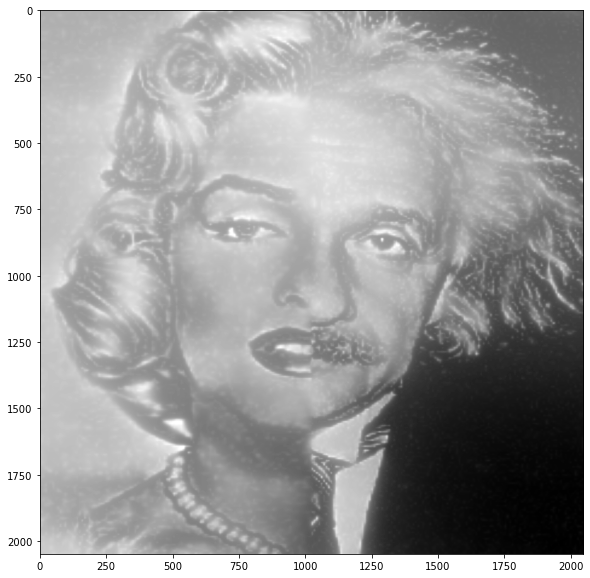

In [127]:
#h31, h32 hybrid

img1 = cv.imread('data/h31.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img1 = cv.resize(img1, (2048, 2048))

img2 = cv.imread('data/h32.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2 = cv.resize(img2, (2048, 2048))
h_hybrid = construct_hybrid_image(img1, img2, 6)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(h_hybrid, cmap='gray')

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(h_hybrid, cmap='gray')

In [ ]:
#einstein.bmp, marilyn.bmp

img1 = cv.imread('data/einstein.bmp')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img1 = cv.resize(img1, (2048, 2048))

img2 = cv.imread('data/marilyn.bmp')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2 = cv.resize(img2, (2048, 2048))
h_hybrid = construct_hybrid_image(img1, img2, 6)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(h_hybrid, cmap='gray')

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(h_hybrid, cmap='gray')

## **Test on other images**
Now construct hybrid images from (h11.jpg, h12.jpg), (h21.jpg h22.jpg), (h31.jpg h33.jpg), and (einstein.bmp, marilyn.bmp) images found in the data folder.

## **Submission**
Include code and all hybrid images in a single jupyter notebook.

Submit via canvas.

<center>
    <tr>
        <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
     </tr>
</center>